# Hands-on Lab: Accessing Databases using Python Script

Using databases is an important and useful method of sharing information. To preserve repeated storage of the same files containing the required data, it is a good practice to save the said data on a database on a server and access the required subset of information using database management systems.

In this lab, you'll learn how to create a database, load data from a CSV file as a table, and then run queries on the data using Python.

# Objectives
In this lab you'll learn how to:

Create a database using Python

Load the data from a CSV file as a table to the database

Run basic "queries" on the database to access the information

# Scenario
Consider a dataset of employee records that is available with an HR team in a CSV file. As a Data Engineer, you are required to create the database called STAFF and load the contents of the CSV file as a table called INSTRUCTORS. The headers of the available data are :

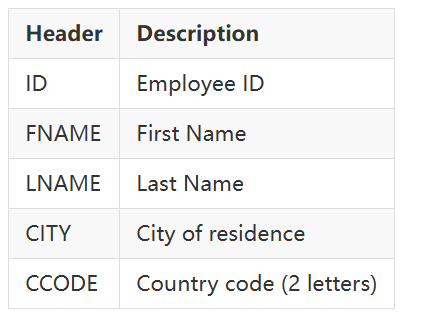

Usually, the database for storing data would be created on a server to which the other team members would have access. For the purpose of this lab, we are going to create the database on a dummy server using SQLite3 library.

Note: SQLite3 is a software library that implements a self-contained, serverless, zero-configuration, transactional SQL database engine. SQLite is the most widely deployed SQL database engine in the world. SQLite3 comes bundled with Python and does not require installation.

In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('STAFF.db')    # Now, you can use SQLite3 to create and 
                                      # connect your process to a new database STAFF using this

table_name = 'INSTRUCTOR'    # To create a table in the database, you first need to have the attributes of the required table
attribute_list = ['ID', 'FNAME', 'LNAME', 'CITY', 'CCODE']
 

file_path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-PY0221EN-Coursera/labs/v2/INSTRUCTOR.csv'

df = pd.read_csv(file_path, names = attribute_list)

df.to_sql(table_name, conn, if_exists = 'replace', index = False)
print('Table is ready')

query_statement = f"SELECT * FROM {table_name}"
query_output = pd.read_sql(query_statement, conn)
print(query_statement)
print(query_output)

# SQL queries can be executed on the data using the read_sql function in pandas

query_statement = f"SELECT FNAME FROM {table_name}"
query_output = pd.read_sql(query_statement, conn)
print(query_statement)
print(query_output)

# Viewing only FNAME column of data

query_statement = f"SELECT COUNT(*) FROM {table_name}"
query_output = pd.read_sql(query_statement, conn)
print(query_statement)
print(query_output)

# Viewing the total number of entries in the table

data_dict = {'ID' : [100],
            'FNAME' : ['John'],
            'LNAME' : ['Doe'],
            'CITY' : ['Paris'],
            'CCODE' : ['FR']}
data_append = pd.DataFrame(data_dict)

data_append.to_sql(table_name, conn, if_exists = 'append', index = False)
print('Data appended successfully')

query_statement = f"SELECT COUNT(*) FROM {table_name}"
query_output = pd.read_sql(query_statement, conn)
print(query_statement)
print(query_output)

conn.close()

Table is ready
SELECT * FROM INSTRUCTOR
    ID    FNAME      LNAME      CITY CCODE
0    1      Rav      Ahuja   TORONTO    CA
1    2     Raul      Chong   Markham    CA
2    3     Hima  Vasudevan   Chicago    US
3    4     John     Thomas  Illinois    US
4    5    Alice      James  Illinois    US
5    6    Steve      Wells  Illinois    US
6    7  Santosh      Kumar  Illinois    US
7    8    Ahmed    Hussain  Illinois    US
8    9    Nancy      Allen  Illinois    US
9   10     Mary     Thomas  Illinois    US
10  11  Bharath      Gupta  Illinois    US
11  12   Andrea      Jones  Illinois    US
12  13      Ann      Jacob  Illinois    US
13  14     Amit      Kumar  NewDelhi    IN
SELECT FNAME FROM INSTRUCTOR
      FNAME
0       Rav
1      Raul
2      Hima
3      John
4     Alice
5     Steve
6   Santosh
7     Ahmed
8     Nancy
9      Mary
10  Bharath
11   Andrea
12      Ann
13     Amit
SELECT COUNT(*) FROM INSTRUCTOR
   COUNT(*)
0        14
Data appended successfully
SELECT COUNT(*) FROM IN